In [1]:
import tensorflow as tf

print(tf.__version__)

2.6.0-dev20210512


# Tensorflow Variable Examples

In [2]:
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [3]:
# Broadcasting support
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [4]:
# Operator overloading is supported
print(a * b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [5]:
# Can specify a data type for tf variables
a = tf.constant(3.0, dtype=tf.float32)
b = tf.constant(4.0, dtype=tf.float32)

c = a+b
print(c)

tf.Tensor(7.0, shape=(), dtype=float32)


In [6]:
# Use NumPy values
import numpy as np

c = np.multiply(a, b)
print(c)
print(type(c))

12.0
<class 'numpy.float32'>


In [7]:
# Obtain numpy value from a tensor:
print(a.numpy())
print(type(a))
print(type(a.numpy()))

3.0
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'numpy.float32'>


# Simple Neural Network with Keras

(10000, 1)
(10000, 1)


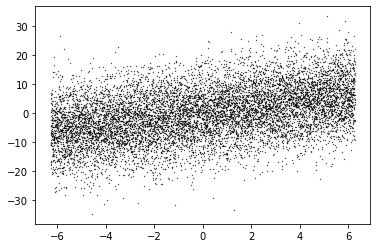

In [8]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = inputs + 8 * np.random.normal(size=[len(inputs),1])
print(inputs.shape)
print(outputs.shape)
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [9]:
# Create a linear model
linear_model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [10]:
# Get results from an untrained model
linear_predictions = linear_model(inputs)
print(linear_predictions)

tf.Tensor(
[[ 9.1091585]
 [ 9.107336 ]
 [ 9.105515 ]
 ...
 [-9.105515 ]
 [-9.107336 ]
 [-9.1091585]], shape=(10000, 1), dtype=float32)


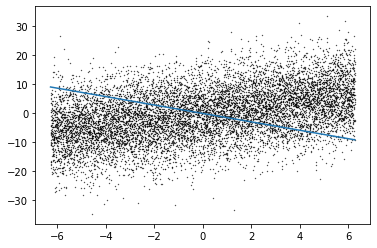

In [11]:
# Plot the untrained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predictions[:, 0])

In [12]:
# Get Loss from library
example_loss = tf.keras.losses.MeanSquaredError()
# Compile the model with an optimizer
linear_model.compile(optimizer='SGD',
                     loss=example_loss,
                     metrics=['mean_squared_error'])

In [13]:
linear_model.fit(inputs,outputs,epochs=1)

313/313 [==============================] - 1s 2ms/step - loss: 65.8109 - mean_squared_error: 65.8109


In [14]:
linear_predict = linear_model.predict(inputs)

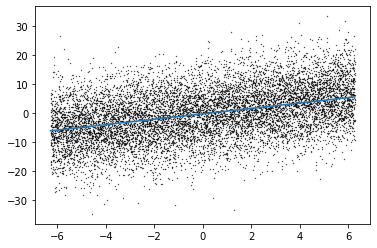

In [15]:
# Plot the trained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predict[:, 0])

## Utilizing a more Complecated Example

(10000, 1)
(10000, 1)


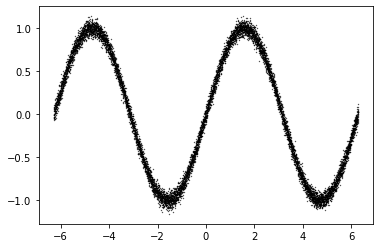

In [16]:
# Input data
import numpy as np
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])
print(inputs.shape)
print(outputs.shape)
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [17]:
# Create a linear model
linear_model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [18]:
# Get results from an untrained model
linear_predictions = linear_model(inputs)
print(linear_predictions)

tf.Tensor(
[[-2.2741961]
 [-2.2737412]
 [-2.2732863]
 ...
 [ 2.2732863]
 [ 2.2737412]
 [ 2.2741961]], shape=(10000, 1), dtype=float32)


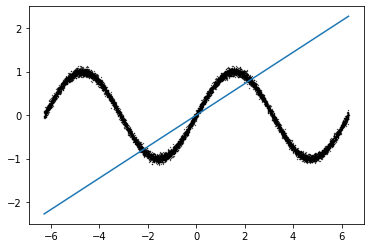

In [19]:
# Plot the untrained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predictions[:, 0])

Basic layer is linear, can change activation to see different outputs

In [20]:
# Create a Deep Model
sample_model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(16,activation='relu',input_shape=[1,]),
                                    tf.keras.layers.Dense(1)
                                    ])

In [21]:
# Compile the model with an optimizer
sample_model.compile(optimizer='adam',
                     loss=example_loss,
                     metrics=['mean_squared_error'])

In [22]:
# Can print out the details of the model after compileing
sample_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [23]:
sample_model.fit(inputs,outputs,epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4805 - mean_squared_error: 0.4805
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2442 - mean_squared_error: 0.2442
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1869 - mean_squared_error: 0.1869
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1616 - mean_squared_error: 0.1616
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1510 - mean_squared_error: 0.1510


In [24]:
sample_predict = sample_model.predict(inputs)

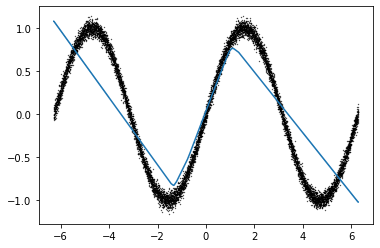

In [25]:
# Plot the untrained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], sample_predict[:, 0])